In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import pandas as pd

In [32]:
#Parameter Kendaraan
lebar = 2.1
tinggi = 3.57
ca = 0.85
af = 6.37

pi = np.pi

kode = "235/75-R17.5"
jari_jari = 0.4

massa_kosong = 8180
massa_isi = 1020
massa_total = massa_kosong + massa_isi

gearbox = 1
axle = 5.86
final_gr = gearbox * axle
mech_eff = 1

kec_max_kmh = 90
kec_operasi_kmh = 50

kec_max_rpm = final_gr*30*(kec_max_kmh/3.6)/pi/jari_jari
kec_operasi_rpm = final_gr*30*(kec_operasi_kmh/3.6)/pi/jari_jari

t_ramp = 20
accel = kec_max_kmh/3.6/t_ramp

theta = 8
theta_percentage = np.tan(np.radians(theta))

crr = 0.02
cd  = 1.05
rho = 1.25
vw  = 0
g   = 9.81
ca  = 1

const_t         = 908.19
highacc_const_t = 1251.89
wp              = 35
# avg_acc = 0.75
# high_acc_wp     =

v_cruise            = 60
s_cruise            = 200
t_cruise            = s_cruise/v_cruise
cruise_percentage   = 33



In [33]:
#Tabel Performansi
v_runres = np.arange(0,121,1)

jumlah_variasi = 10
variasi_array = np.arange(0,jumlah_variasi+1,1)
pengali = variasi_array/jumlah_variasi
gradien = np.full(shape=len(variasi_array),fill_value=theta,dtype=np.int)*pengali

rd = rho/2*af*cd*np.square((v_runres/3.6+vw/3.6))
rg = massa_total*g*np.sin(np.radians(gradien))
rrr = massa_total*crr*g*np.cos(np.radians(gradien))

runres_vehicle = np.array([])
for i in range (0,len(variasi_array)):
    temp = rd+rg[i]+rrr[i]
    runres_vehicle = np.concatenate((runres_vehicle,temp))
runres_vehicle = np.reshape(runres_vehicle,(len(v_runres),len(variasi_array)),order='F')
runres_wheel = runres_vehicle * jari_jari
runres_motor = runres_wheel/final_gr



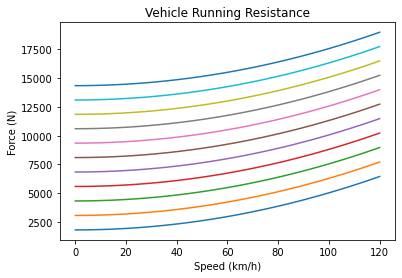

In [34]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_vehicle[:,i]);
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Vehicle Running Resistance');
fig.savefig("motorrunres.png")

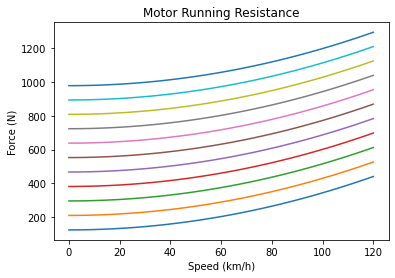

In [35]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_motor[:,i]);
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Motor Running Resistance');

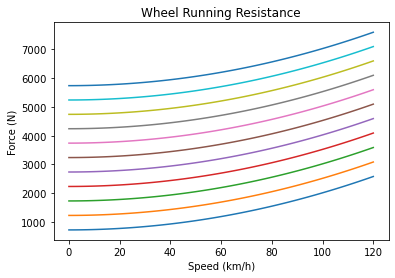

In [36]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_wheel[:,i]);
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Wheel Running Resistance');


In [37]:
#Hasil kebutuhan traksi
# kec_arr = np.array([0, kec_operasi_kmh, kec_max_rpm])

In [38]:
#Tractive Effort

# tractive_effort_vehicle = massa_total*accel + runres_vehicle
# tractive_effort_motor   = massa_total*accel + runres_motor
# tractive_effort_wheel   = massa_total*accel + runres_wheel

# Mencari Vehicle Force
const_f = const_t*final_gr/jari_jari*gearbox
v_wp    = wp/3.6
const_p = const_f*v_wp

const_p_real = const_p/(v_runres[1:]/3.6)
const_p_real = np.insert(const_p_real,0,const_p_real[0])
const_f_real = np.full(shape=len(const_p_real),fill_value=const_f,dtype=np.int)

const_fp_real = np.concatenate((const_f_real,const_p_real))
const_fp_real = np.reshape(const_fp_real,(len(const_p_real),2),order='F')

#Tractive Effort
vehicle_force       = const_fp_real.min(axis=1)
wheel_torque        = vehicle_force*jari_jari
motor_torque        = wheel_torque/final_gr/mech_eff
motor_cruise_torque = motor_torque*cruise_percentage/100

vehicle_force_arr = vehicle_force.reshape(vehicle_force.shape[0],-1)
temp = vehicle_force_arr
for i in range (0,5):
    vehicle_force_arr = np.concatenate((vehicle_force_arr,temp),axis=1)
# print ( np.concatenate((,vehicle_force),axis=1))
# print(vehicle_force_arr)

accel_real     = np.subtract(vehicle_force_arr,runres_vehicle)/massa_total

for i in range (len(accel_real)):
    if accel_real[i,0] < 0:
        break
    idx = i

avg_accel_real  = accel_real[:idx,0].mean()
p_motor         = (const_t*mech_eff*final_gr/jari_jari)*(wp/3.6)/1000
highacc_wp = 3.6*p_motor*1000*jari_jari/highacc_const_t/final_gr
pt_cruise           = cruise_percentage/100*p_motor

#Traffic Effort Peak
const_f_peak = highacc_const_t*final_gr/jari_jari*mech_eff
v_wp_peak    = highacc_wp/3.6
const_p_peak = const_f_peak*v_wp_peak


const_p_peak_real = const_p_peak/(v_runres[1:]/3.6)
const_p_peak_real = np.insert(const_p_peak_real,0,const_p_peak_real[0])
const_f_peak_real = np.full(shape=len(const_p_peak_real),fill_value=const_f_peak,dtype=np.int)

const_fp_peak_real = np.concatenate((const_f_peak_real,const_p_peak_real))
const_fp_peak_real = np.reshape(const_fp_peak_real,(len(const_p_peak_real),2),order='F')

vehicle_force_peak       = const_fp_peak_real.min(axis=1)
wheel_torque_peak        = vehicle_force_peak*jari_jari
motor_torque_peak        = wheel_torque_peak/final_gr/mech_eff
motor_cruise_torque_peak = motor_torque_peak*cruise_percentage/100

print(v_wp_peak)
pd.DataFrame(motor_torque_peak)


ValueError: operands could not be broadcast together with shapes (121,6) (121,11) 

NameError: name 'variasi_array' is not defined

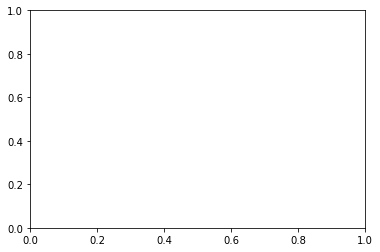

In [ ]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_vehicle[:,i]);
    ax.plot(v_runres, vehicle_force[:]);
    ax.plot(v_runres, vehicle_force_peak[:],linestyle='--');
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Vehicle Running Resistance');

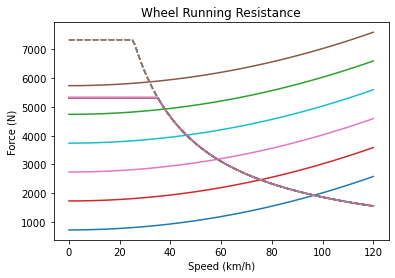

In [ ]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_wheel[:,i]);
    ax.plot(v_runres, wheel_torque[:]);
    ax.plot(v_runres, wheel_torque_peak[:],linestyle='--');
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Wheel Running Resistance');

NameError: name 'variasi_array' is not defined

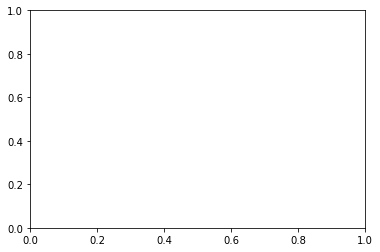

In [ ]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_motor[:,i]);
    ax.plot(v_runres, motor_torque[:]);
    ax.plot(v_runres, motor_torque_peak[:],linestyle='--');
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Motor Running Resistance');

In [ ]:
#Screen Size
import sys
from PyQt5 import QtWidgets

app = QtWidgets.QApplication(sys.argv)

screen = app.primaryScreen()
print('Screen: %s' % screen.name())
size = screen.size()
print('Size: %d x %d' % (size.width(), size.height()))
rect = screen.availableGeometry()
print('Available: %d x %d' % (rect.width(), rect.height()))

Screen: \\.\DISPLAY1
Size: 1920 x 1080
Available: 1920 x 1030


In [134]:
from fpdf import FPDF

pdf_w=210
pdf_h=297

p_motor=1;


class PDF(FPDF):
    def titles(self):

        #Halaman 1
        self.add_page()

        #Set Warna
        self.set_text_color(0, 0, 0)\
        
        #Judul
        self.set_xy(0.0,0.0)
        self.set_font('Arial', 'B', 16)
        self.cell(w=210.0, h=40.0, align='C', txt="PERFORMANCE REPORT", border=0)


        #Design Summary
        self.set_xy(10.0,35.0)
        self.set_font('Arial', 'B', 12)
        self.cell(w=0.0, h=0.0, align='L', txt="Design Summary", border=0)

        self.set_xy(10.0,45.0)
        self.set_font('Arial', '', 11)
        self.cell(w=0.0, h=0.0, align='L', txt="Motor Power =", border=0)

        self.set_xy(10.0,50.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Motor Nom Torque =", border=0)

        self.set_xy(10.0,55.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Motor Peak Torque =", border=0)

        self.set_xy(10.0,60.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Motor RPM =", border=0)

        self.set_xy(100.0,45.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Gradeability =", border=0)
        
        self.set_xy(100.0,50.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Battery Power =", border=0)

        self.set_xy(100.0,55.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Battery Energy =", border=0)

        self.set_xy(100.0,60.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Final Gear Ratio =", border=0)

        #Grafik Motor Running Resistance
        self.set_xy(10.0,70.0)
        self.set_font('Arial', 'B', 12)
        self.cell(w=0.0, h=0.0, align='L', txt="Grafik  Motor Running Resistance", border=0)

        self.set_xy(40.0,70.0)
        self.image('motorrunres.png',  link='', type='', w=700/5, h=450/5)

        #Parameter Kendaraan
        self.set_xy(10.0,170.0)
        self.set_font('Arial', 'B', 12)
        self.cell(w=0.0, h=0.0, align='L', txt="Parameter Kendaraan", border=0)

        self.set_xy(10.0,180.0)
        self.set_font('Arial', '', 11)
        self.cell(w=0.0, h=0.0, align='L', txt="Lebar Kendaraan =", border=0)

        self.set_xy(10.0,185.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Tinggi Kendaraan =", border=0)

        self.set_xy(10.0,190.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Ca =", border=0)

        self.set_xy(10.0,195.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Af =", border=0)

        self.set_xy(10.0,205.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Kode Ban =", border=0)

        self.set_xy(10.0,210.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Jari - jari Ban =", border=0)

        self.set_xy(100.0,180.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Massa Kosong =", border=0)

        self.set_xy(100.0,185.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Massa Isi =", border=0)

        self.set_xy(100.0,190.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Massa Total =", border=0)

        self.set_xy(100.0,200.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Gear Box =", border=0)
        
        self.set_xy(100.0,205.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Axle =", border=0)

        self.set_xy(100.0,210.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Final GR =", border=0)

        self.set_xy(150.0,200.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Mech Eff =", border=0)

        #Dinamika Bergerak
        self.set_xy(10.0,220.0)
        self.set_font('Arial', 'B', 12)
        self.cell(w=0.0, h=0.0, align='L', txt="Dinamika Bergerak", border=0)

        self.set_xy(10.0,230.0)
        self.set_font('Arial', '', 11)
        self.cell(w=0.0, h=0.0, align='L', txt="Rolling Resistance =", border=0)

        self.set_xy(10.0,235.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Drag Resistance =", border=0)

        self.set_xy(10.0,240.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Massa Jenis Udara =", border=0)

        self.set_xy(100.0,230.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Kecepatan Angin =", border=0)

        self.set_xy(100.0,235.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Percepatan Gravitasi =", border=0)

        self.set_xy(100.0,240.0)
        self.cell(w=0.0, h=0.0, align='L', txt="Acceleration Margin =", border=0)

        #Halaman 2
        self.add_page()

        #Vehicle Running Resistance
        self.set_xy(10.0,10.0)
        self.set_font('Arial', 'B', 12)
        self.cell(w=0.0, h=0.0, align='L', txt="Grafik Vehicle Running Resistance", border=0)

        self.set_xy(30.0,15.0)
        self.image('rumus_vehiclerunres.png',  link='', type='', w=0, h=0)

        self.set_xy(40.0,35.0)
        self.image('motorrunres.png',  link='', type='', w=0, h=0)

        #Wheel Running Resistance
        self.set_xy(10.0,145.0)
        self.set_font('Arial', 'B', 12)
        self.cell(w=0.0, h=0.0, align='L', txt="Grafik Wheel Running Resistance", border=0)

        self.set_xy(30.0,150.0)
        self.image('rumus_wheelrunres.png',  link='', type='', w=0, h=0)

        self.set_xy(40.0,170.0)
        self.image('motorrunres.png',  link='', type='', w=0, h=0)


        


 
    def lines(self):
        self.set_line_width(0.5)
        self.line(5.0,5.0,205.0,5.0) # top one
        self.line(5.0,292.0,205.0,292.0) # bottom one
        self.line(5.0,5.0,5.0,292.0) # left one
        self.line(205.0,5.0,205.0,292.0) # right one

    def charts(self):
        self.set_xy(40.0,35.0)
        self.image('motorrunres.png',  link='', type='', w=700/10, h=450/10)

    

pdf = PDF(orientation='P', unit='mm', format='A4')
# pdf.add_page()

# pdf.lines()
pdf.titles()
pdf.set_author('INKA')
# pdf.charts()
pdf.output('report.pdf','F')


''